In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.simplefilter("error",RuntimeWarning)

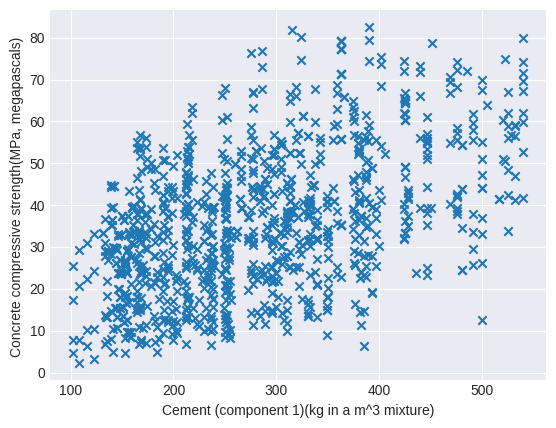

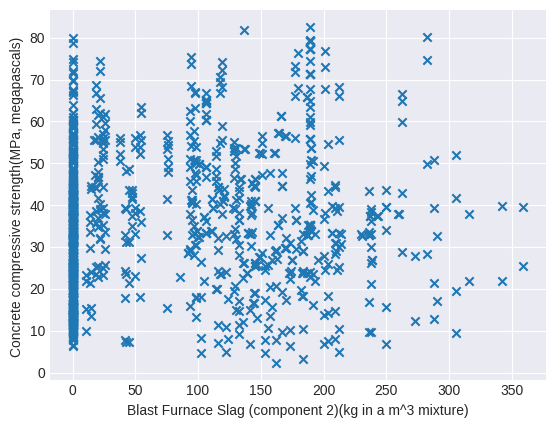

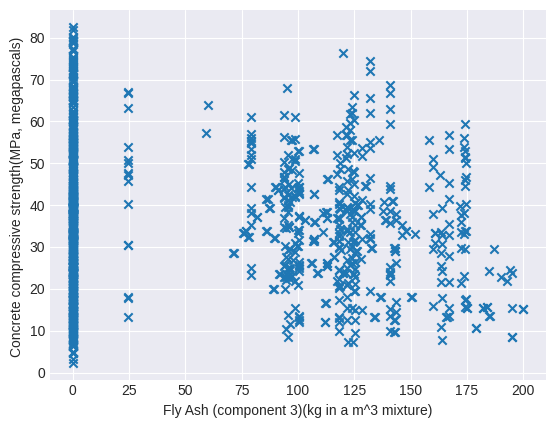

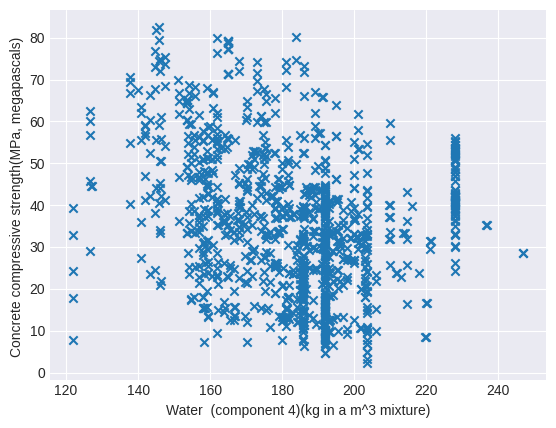

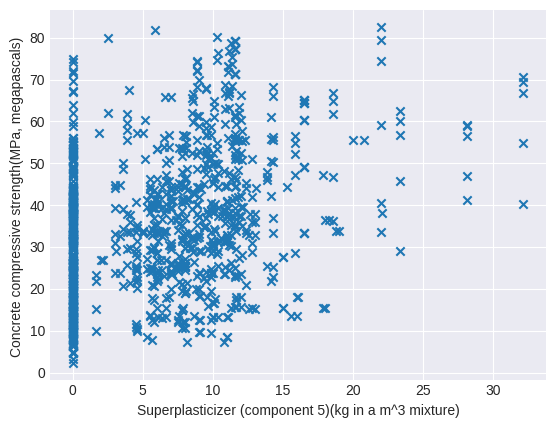

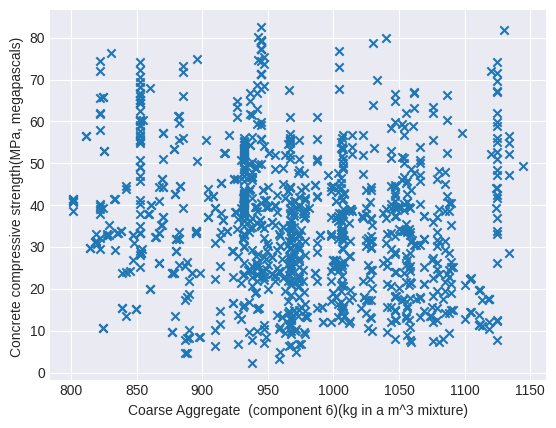

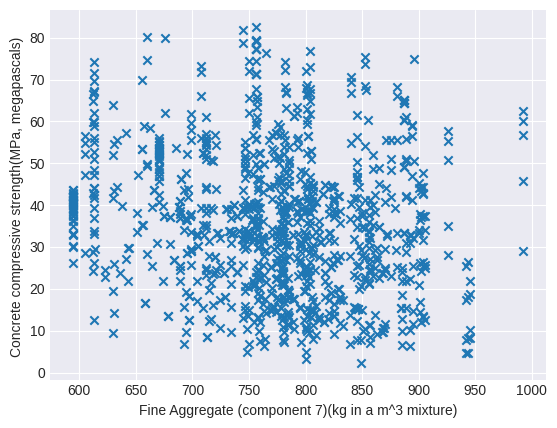

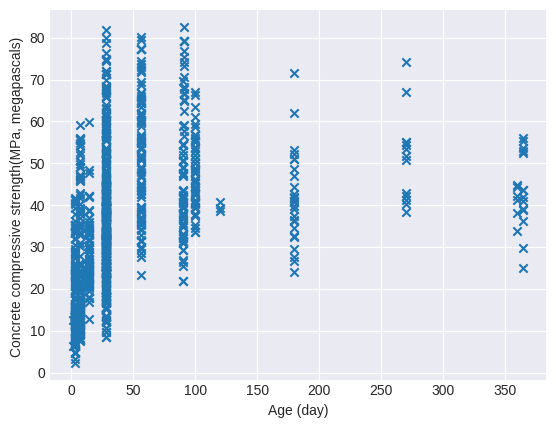

In [2]:
df = pd.read_csv("./Concrete_Data.csv")
data = df.to_numpy()
features = df.columns[:-1]
y_label = df.columns[-1]
plt.style.use('seaborn-v0_8-darkgrid')

def print_features():
    n = len(features)
    y_data = data[:,-1]
    for i in range(n):
        x_data = data[:,i]
        plt.xlabel(features[i])
        plt.ylabel(y_label)
        plt.scatter(x_data,y_data,marker='x')
        plt.show()
        
print_features()

In [3]:
def compute_cost(x,y,w,b):
    n= x.shape[0]
    cost = 0
    for i in range(n):
        f = w*x[i] + b
        error = f - y[i]
        cost+=((error**2)/(2*n))
        
    return cost

def compute_gradient(x,y,w,b):
    n= x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(n):
        f = w*x[i]+ b
        error = f - y[i]
        dj_dw+=(((error)*x[i])/n)
        dj_db+=((error)/n)
        
    return dj_dw,dj_db

def gradient_descent(x,y,w,b,alpha):
    for _ in range(1000):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
    return w,b

linear regression not possible for 0.1
linear regression not possible for 0.01
linear regression not possible for 0.001
linear regression not possible for 0.0001
linear regression not possible for 1e-05


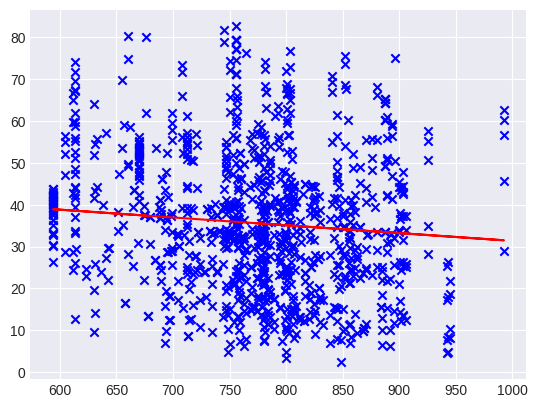

for w=5,b=50,w=-0.01864827967471969 and b=49.99372092636211 and cost=138.36900382294883


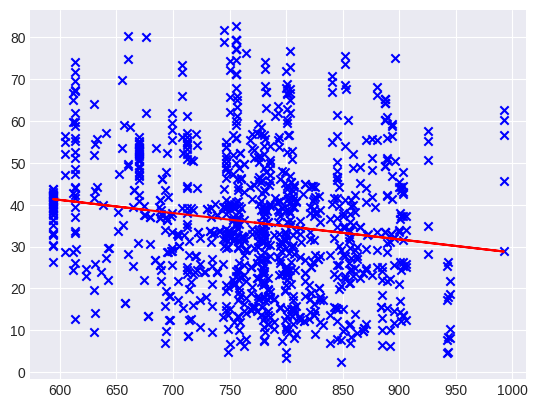

for w=10,b=60,w=-0.03142146401817398 and b=59.98720600129311 and cost=137.55358252344175


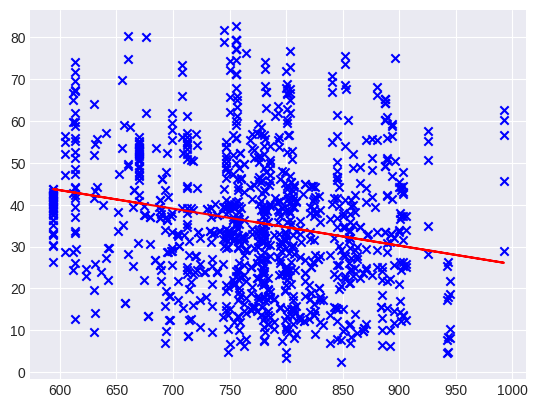

for w=15,b=70,w=-0.04419464836162819 and b=69.98069107622403 and cost=137.8158858891938
minimum cost is 137.55358252344175


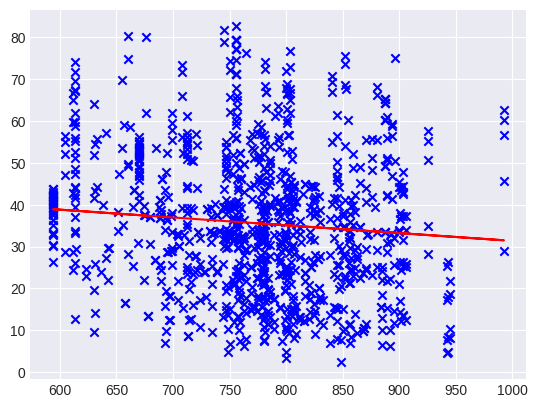

for w=5,b=50,w=-0.018648123784530433 and b=49.99359896098235 and cost=138.36902035136885


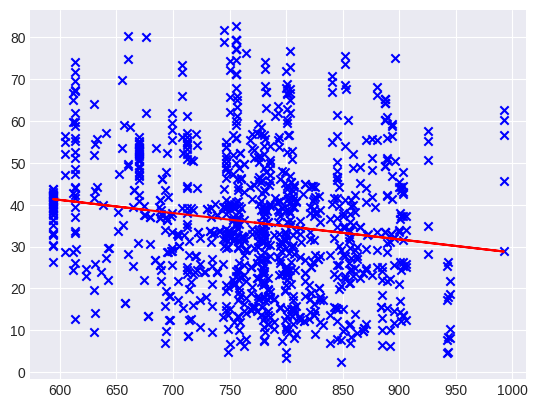

for w=10,b=60,w=-0.03142143218375629 and b=59.987181094678625 and cost=137.55358321270901


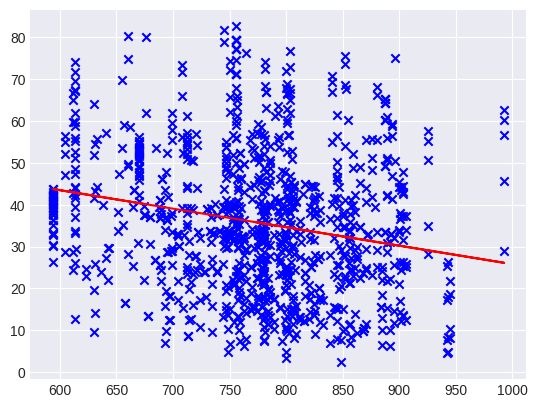

for w=15,b=70,w=-0.04419474058298374 and b=69.98076322837626 and cost=137.81589167357325
minimum cost is 137.55358321270901


In [4]:
feature_num = 6
alpha = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
x = data[:1000,feature_num]
y = data[:1000,-1]
x_label = df.columns[feature_num]
y_label = df.columns[-1]
test_w = []
test_b = []

for i in alpha:
    mini = 1e8
    w_mini = 1e8
    b_mini = 1e8
    try:
        w,b = gradient_descent(x,y,5,50,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
            w_mini = w
            b_mini = b
        Y = w*x + b
        plt.plot(x,Y,c='r')
        plt.scatter(x,y,c='b',marker='x')
        plt.show()
        print(f"for w=5,b=50,w={w} and b={b} and cost={cost}")
        
        w,b = gradient_descent(x,y,10,60,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        Y = w*x + b
        plt.plot(x,Y,c='r')
        plt.scatter(x,y,c='b',marker='x')
        plt.show()
        print(f"for w=10,b=60,w={w} and b={b} and cost={cost}")
        
        w,b = gradient_descent(x,y,15,70,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        Y = w*x + b
        plt.plot(x,Y,c='r')
        plt.scatter(x,y,c='b',marker='x')
        plt.show()
        print(f"for w=15,b=70,w={w} and b={b} and cost={cost}")
        test_w.append(w_mini)
        test_b.append(b_mini)
        
        print(f"minimum cost is {mini}")
    except:
        print(f"linear regression not possible for {i}")
    

linear regression not possible for 0.1
linear regression not possible for 0.01
linear regression not possible for 0.001
linear regression not possible for 0.0001
linear regression not possible for 1e-05


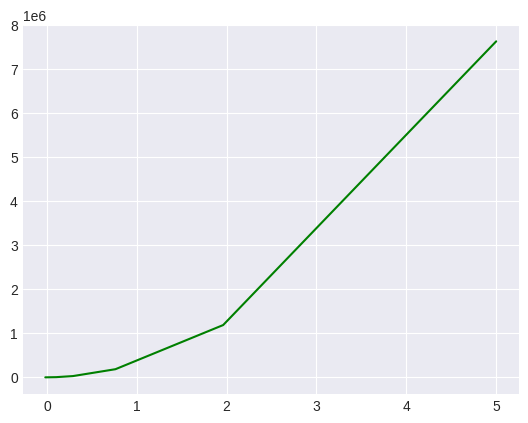

for w=5,b=50,w=-0.01864827967471969 and b=49.99372092636211 and cost=138.36900382294883


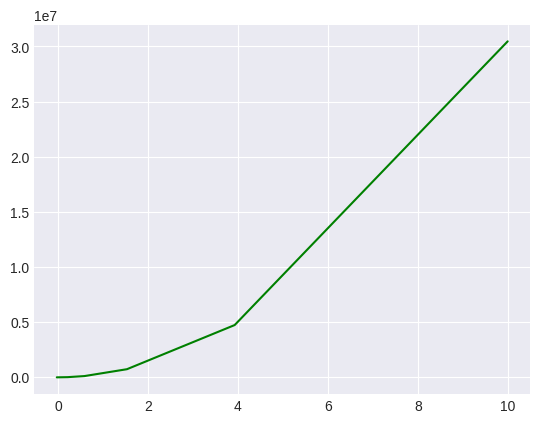

for w=10,b=60,w=-0.03142146401817398 and b=59.98720600129311 and cost=137.55358252344175


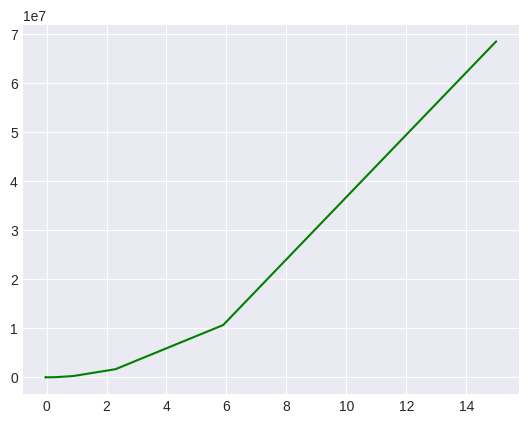

for w=15,b=70,w=-0.04419464836162819 and b=69.98069107622403 and cost=137.8158858891938
minimum cost is 137.55358252344175


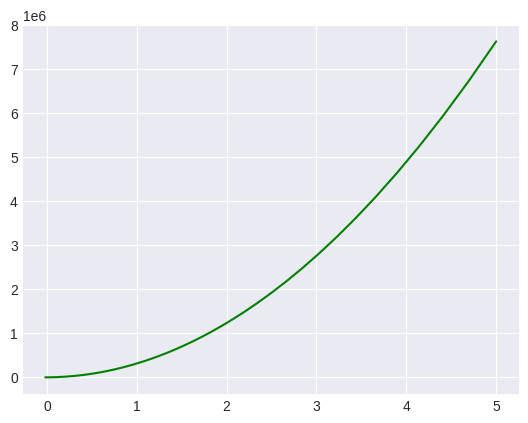

for w=5,b=50,w=-0.018648123784530433 and b=49.99359896098235 and cost=138.36902035136885


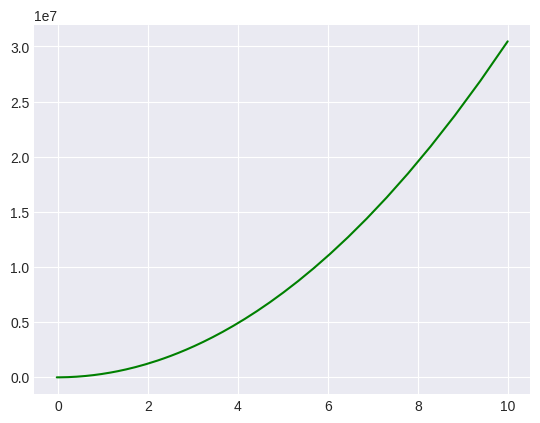

for w=10,b=60,w=-0.03142143218375629 and b=59.987181094678625 and cost=137.55358321270901


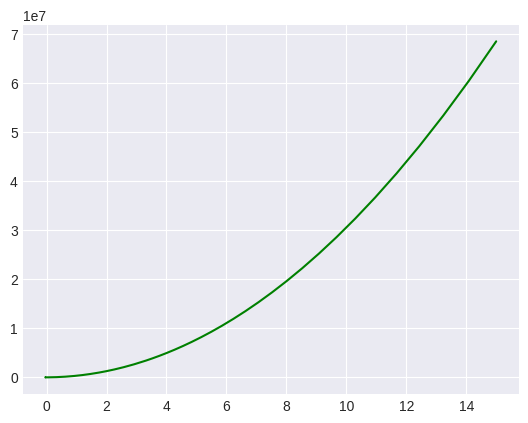

for w=15,b=70,w=-0.04419474058298374 and b=69.98076322837626 and cost=137.81589167357325
minimum cost is 137.55358321270901


In [5]:
def weight_vector(x,y,w,b,alpha):
    c_history = []
    w_history = []
    cost = compute_cost(x,y,w,b)
    c_history.append(cost)
    w_history.append(w)
    for _ in range(1000):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        cost = compute_cost(x,y,w,b)
        c_history.append(cost)
        w_history.append(w)
        
    plt.plot(w_history,c_history,c='g')
    plt.show()
    
    return w,b

for i in alpha:
    mini = 1e8
    try:
        w,b = weight_vector(x,y,5,50,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        print(f"for w=5,b=50,w={w} and b={b} and cost={cost}")
        
        w,b = weight_vector(x,y,10,60,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        print(f"for w=10,b=60,w={w} and b={b} and cost={cost}")
        
        w,b = weight_vector(x,y,15,70,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        print(f"for w=15,b=70,w={w} and b={b} and cost={cost}")
        print(f"minimum cost is {mini}")
    except:
        print(f"linear regression not possible for {i}")
    

In [6]:
test_x_data = data[1000::5,feature_num]
test_y_data = data[1000::5,-1]

for i in range(len(test_w)):
    print(f"for w={test_w[i]} and b={test_b[i]}, the predicted values are")
    for j in test_x_data:
        f = test_w[i]*j + test_b[i]
        print(f.round(2),end=" ")
    print()
    print(f"the actual values are")
    for j in test_y_data:
        print(j,end=" ")
    print()

for w=-0.01864827967471969 and b=49.99372092636211, the predicted values are
35.35 34.68 36.26 36.76 34.52 35.67 
the actual values are
44.61 33.4 40.06 52.43 42.14 44.28 
for w=-0.018648123784530433 and b=49.99359896098235, the predicted values are
35.35 34.68 36.26 36.76 34.52 35.67 
the actual values are
44.61 33.4 40.06 52.43 42.14 44.28 


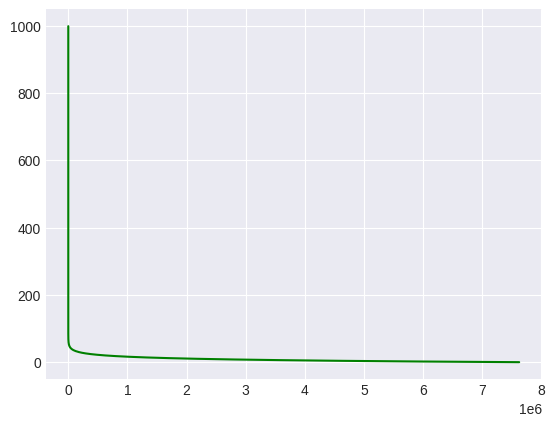

for w=5,b=50,w=-0.018648123767209215 and b=49.99359894743057 and cost=138.36902035320566


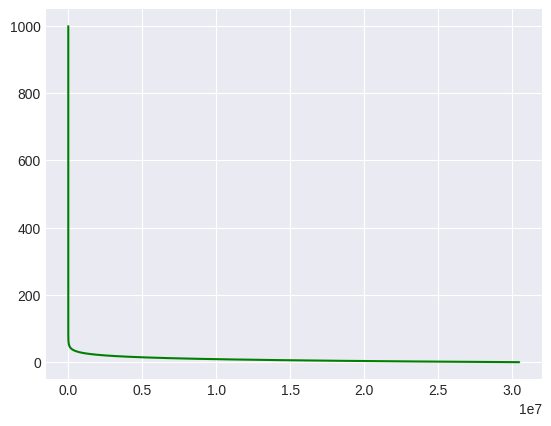

for w=10,b=60,w=-0.03142143218021912 and b=59.98718109191121 and cost=137.55358321278584


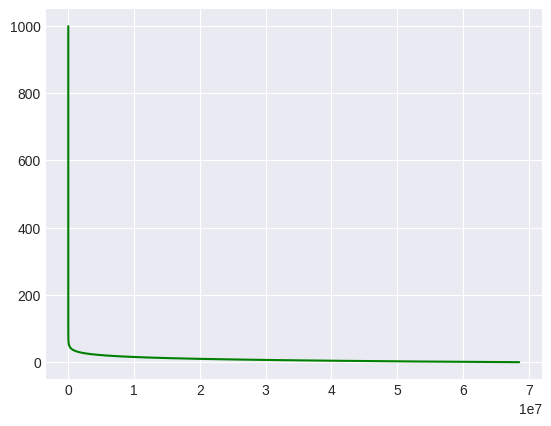

for w=15,b=70,w=-0.0441947405932306 and b=69.9807632363932 and cost=137.81589167421612
minimum cost is 137.55358321278584


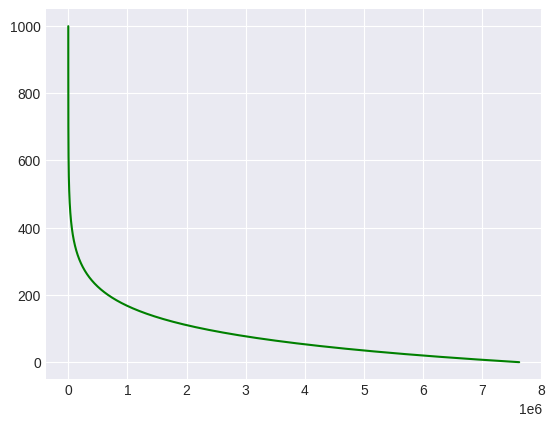

for w=5,b=50,w=-0.007019803558858053 and b=49.99360162575482 and cost=179.307127678829


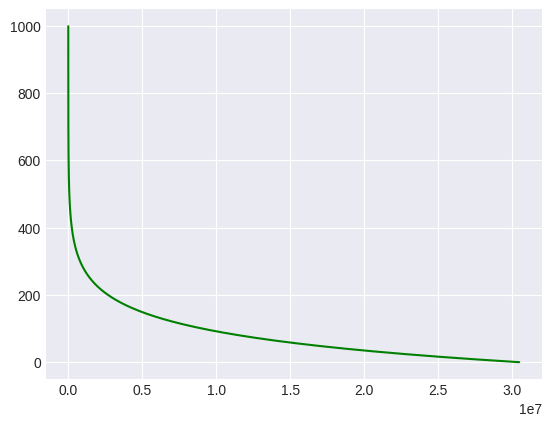

for w=10,b=60,w=-0.008178431718959989 and b=59.98720831179121 and cost=301.11437496471035


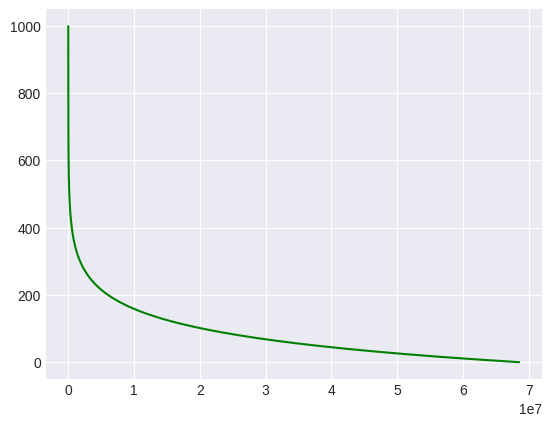

for w=15,b=70,w=-0.009337059879062276 and b=69.98081499782785 and cost=505.68400637482927
minimum cost is 179.307127678829


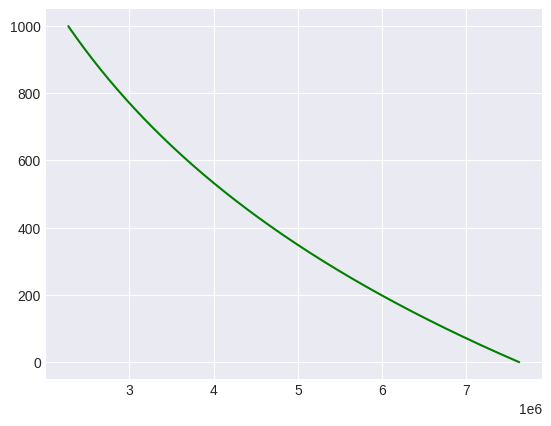

for w=5,b=50,w=2.7216558354733267 and b=49.997088067190894 and cost=2273625.0387892956


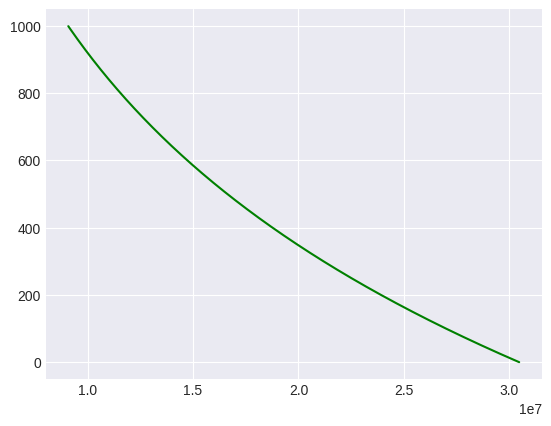

for w=10,b=60,w=5.44597868041948 and b=59.994179300104285 and cost=9083442.055881858


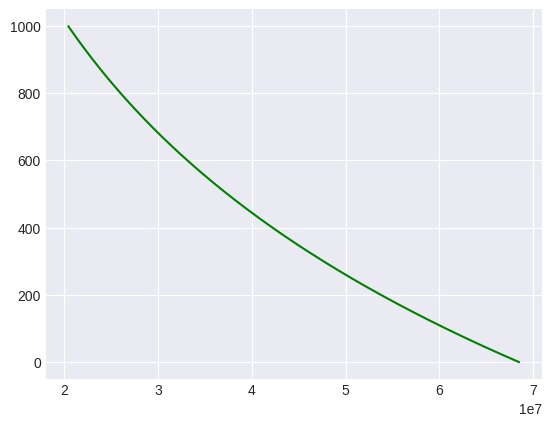

for w=15,b=70,w=8.170301525365662 and b=69.99127053301765 and cost=20429594.428807553
minimum cost is 2273625.0387892956


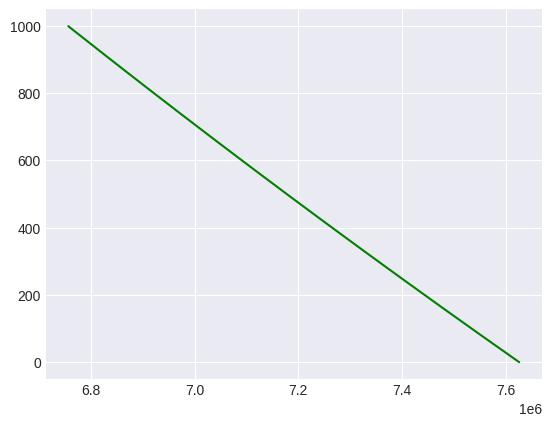

for w=5,b=50,w=4.705408639296877 and b=49.99962348125469 and cost=6756690.822621612


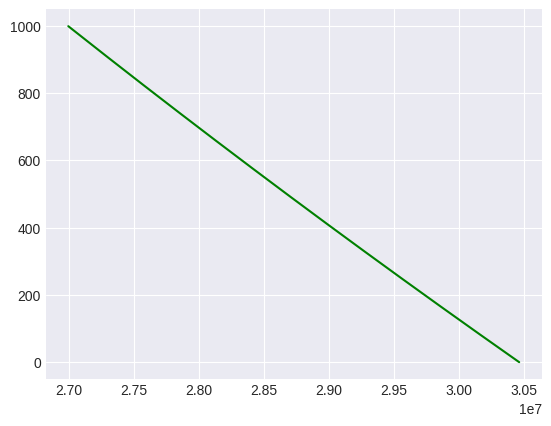

for w=10,b=60,w=9.411162124618844 and b=59.99924737896283 and cost=26994719.988536756


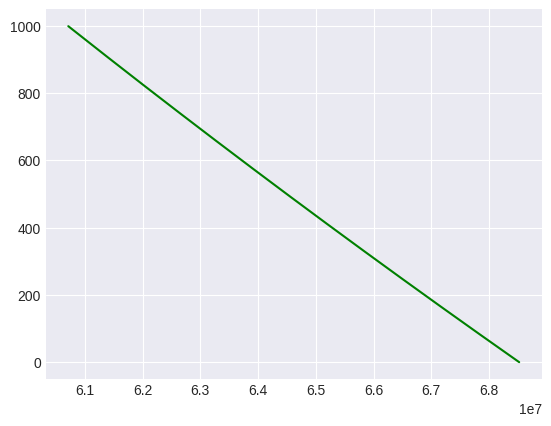

for w=15,b=70,w=14.116915609940799 and b=69.99887127667084 and cost=60714237.018345214
minimum cost is 6756690.822621612


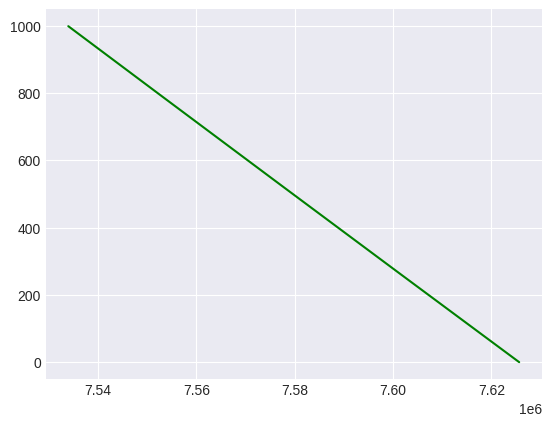

for w=5,b=50,w=4.969733312573891 and b=49.99996131595289 and cost=7533941.147183932


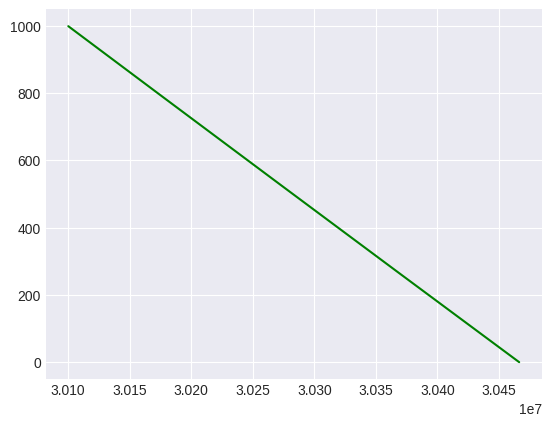

for w=10,b=60,w=9.939502055062627 and b=59.99992267475927 and cost=30100082.982916113


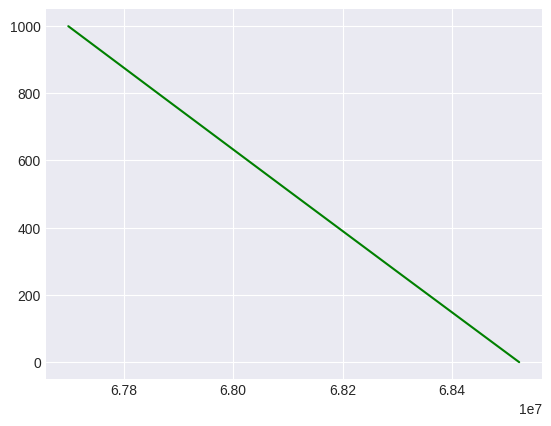

for w=15,b=70,w=14.909270797551354 and b=69.99988403356535 and cost=67698576.09284942
minimum cost is 7533941.147183932


In [7]:
alpha = [1e-7,1e-8,1e-9,1e-10,1e-11]

def training_curve(x,y,w,b,alpha):
    c_history = []
    i_history = []
    cost = compute_cost(x,y,w,b)
    c_history.append(cost)
    i_history.append(0)
    for _ in range(1,1000):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        cost = compute_cost(x,y,w,b)
        c_history.append(cost)
        i_history.append(_)
        
    plt.plot(c_history,i_history,c='g')
    plt.show()
    
    return w,b

for i in alpha:
    mini = 1e8
    try:
        w,b = training_curve(x,y,5,50,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        print(f"for w=5,b=50,w={w} and b={b} and cost={cost}")
            
        w,b = training_curve(x,y,10,60,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        print(f"for w=10,b=60,w={w} and b={b} and cost={cost}")
        
        w,b = training_curve(x,y,15,70,i)
        cost = compute_cost(x,y,w,b)
        if cost < mini :
            mini = cost
        print(f"for w=15,b=70,w={w} and b={b} and cost={cost}")
        print(f"minimum cost is {mini}")
    except:
        print(f"linear regression not possible for {i}")
    

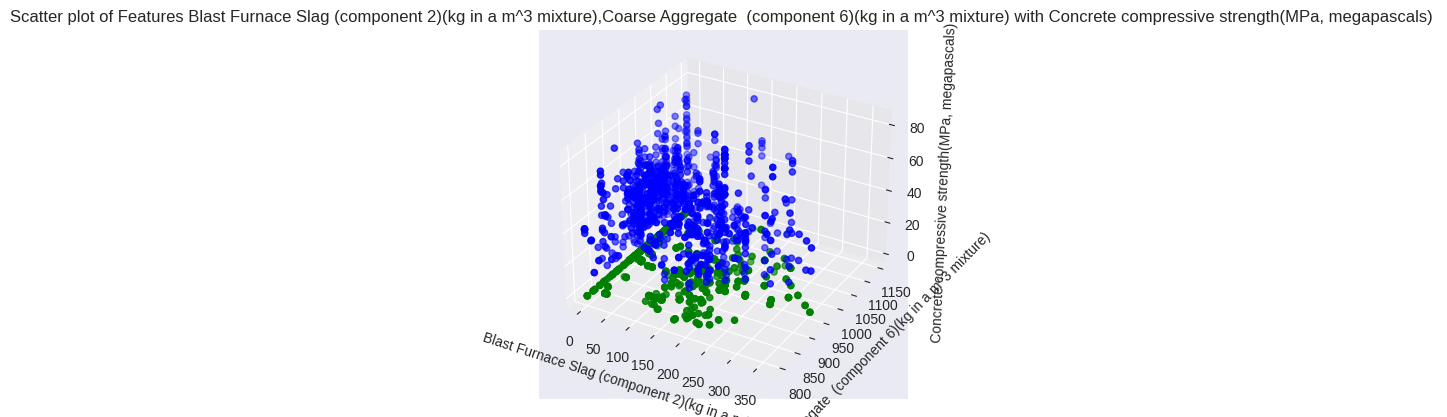

for w=[45 45],b=5,w=[19.29281482 -1.37106194] and b=4.945886180603509 and cost=1429760.548036858
minimum cost is 1429760.548036858


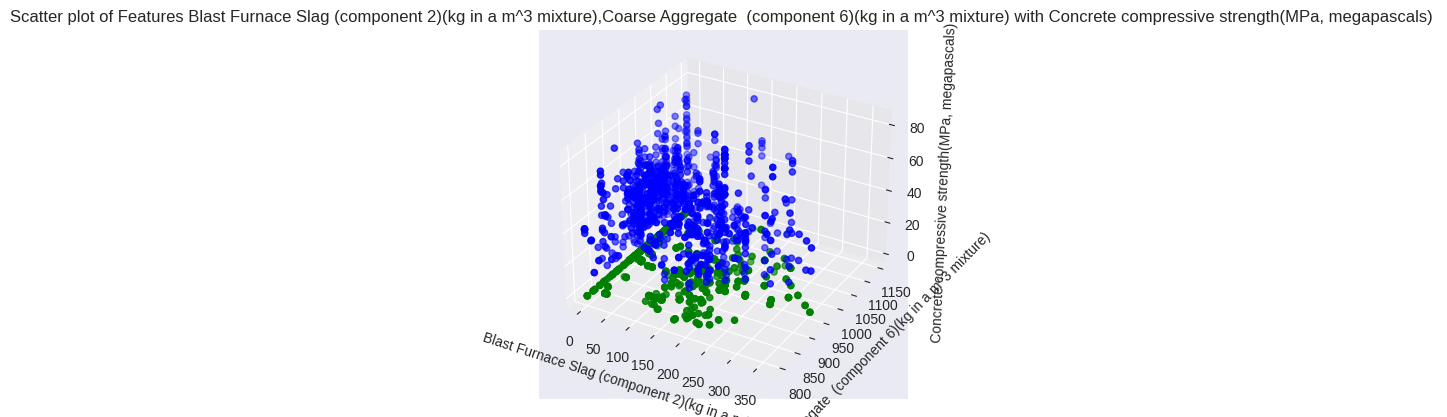

for w=[45 45],b=5,w=[38.45035076 -2.76039005] and b=4.950385093501529 and cost=5688935.6395848235
minimum cost is 5688935.6395848235


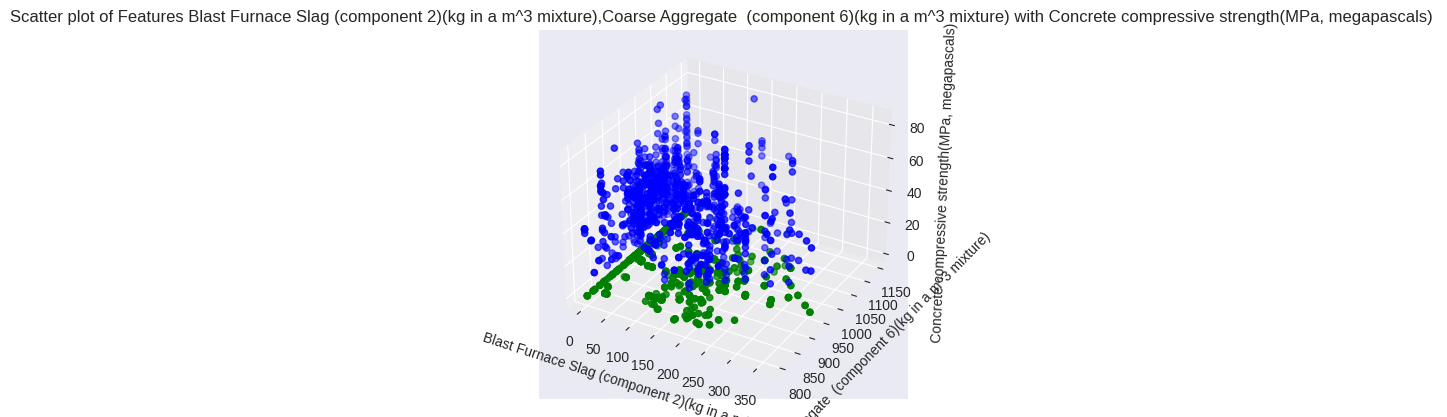

for w=[45 45],b=5,w=[42.52694237 15.3563721 ] and b=4.969694999222618 and cost=168888876.4987421
minimum cost is 168888876.4987421


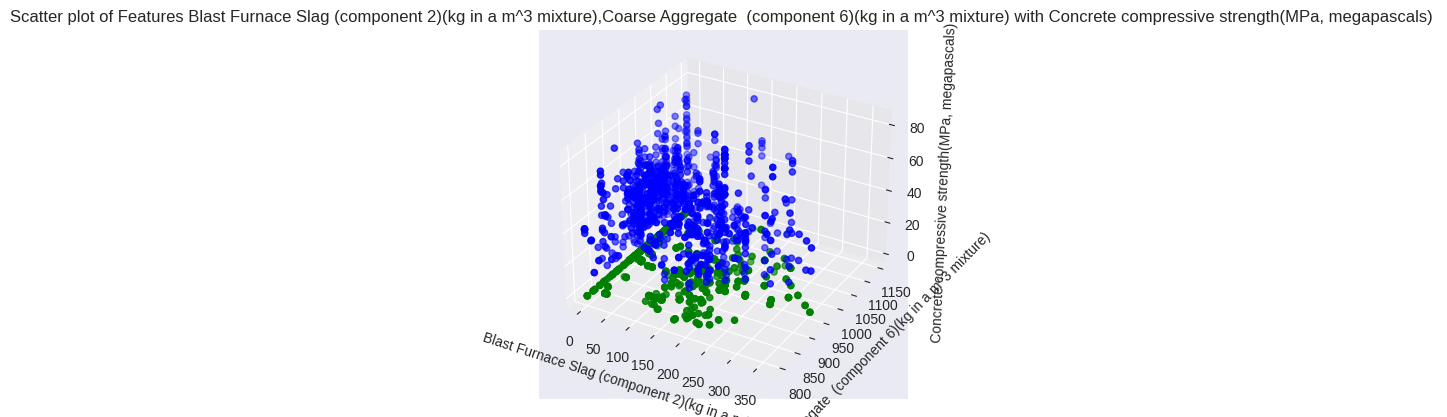

for w=[45 45],b=5,w=[44.64815644 40.59881573] and b=4.995505337488677 and cost=925543190.4883194
minimum cost is 925543190.4883194


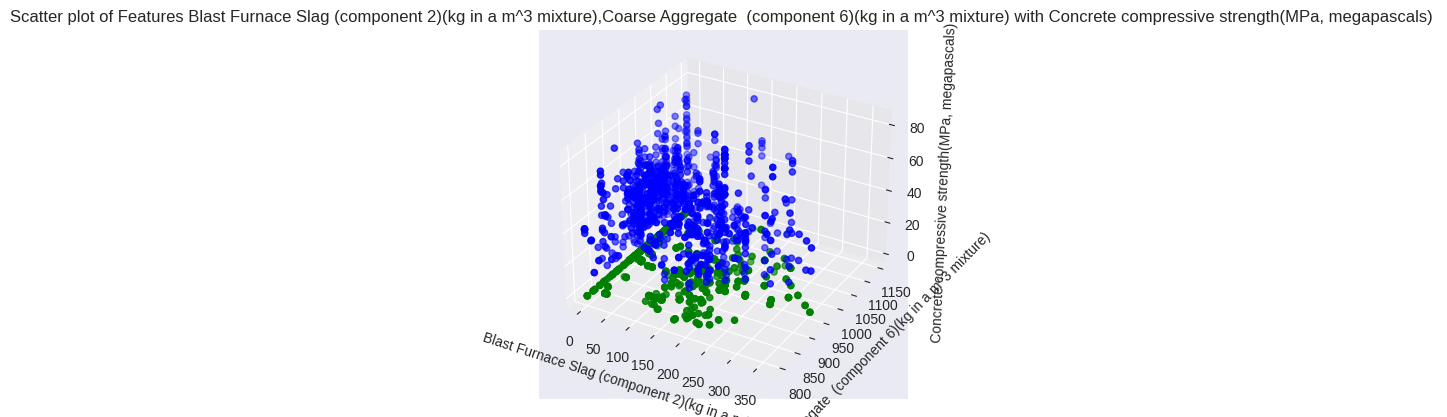

for w=[45 45],b=5,w=[44.96341205 44.54058471] and b=4.999530869810465 and cost=1099386457.5394135
minimum cost is 1099386457.5394135


In [8]:
feature_num1 = 1
feature_num2 = 5
newx = data[:1000, [feature_num1, feature_num2]]

alpha = [1e-7,1e-8,1e-9,1e-10,1e-11]

def compute_cost2(x,y,w,b):
    n = x.shape[0]
    cost = 0
    for i in range(n):
        f = np.dot(x[i],w) + b
        error = f - y[i]
        cost+=((error**2)/(2*n))
        
    return cost

def compute_gradient2(x,y,w,b):
    n,m = x.shape
    dj_dw = np.zeros(m)
    dj_db = 0
    for i in range(n):
        f = np.dot(x[i],w) + b
        error = f - y[i]
        for j in range(m):
            dj_dw[j]+=((error)*x[i,j])/n
        dj_db+=((error)/n)
        
    return dj_dw,dj_db

def gradient_descent2(x,y,w,b,alpha):
    for _ in range(1000):
        dj_dw,dj_db = compute_gradient2(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    return (w,b)

for i in alpha:
    mini = 1e14
    try:
        w1 = np.array([45,45])
        b1 = 5
        w,b = gradient_descent2(newx,y,w1,b1,i)
        cost = compute_cost2(newx,y,w,b)
        if cost < mini :
            mini = cost
        Y = newx[:,0]*w[0] + newx[:,1]*w[1] + b
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.set_xlabel(features[feature_num1])
        ax.set_ylabel(features[feature_num2])
        ax.set_zlabel(y_label)
        plt.title(f"Scatter plot of Features {features[feature_num1]},{features[feature_num2]} with {y_label}")  
        ax.scatter(newx[:,0],newx[:,1],y,c='b')
        ax.scatter(newx[:,0],newx[:,1],c='g')
        plt.show()
        print(f"for w={w1},b={b1},w={w} and b={b} and cost={cost}")        
        print(f"minimum cost is {mini}")
    except:
        print(f"linear regression not possible for {i}")
